<a href="https://colab.research.google.com/github/aettikang/matchupAdvanced/blob/main/1%EC%A3%BC%EC%B0%A8_EDA%EA%B0%9C%EC%9A%94_%EC%88%98%EC%97%85%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

bank = pd.read_csv("/content/drive/MyDrive/Classroom/EDA심화/1주차/bank.csv", sep=';')
bank.head()
bank.columns
bank.shape
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64


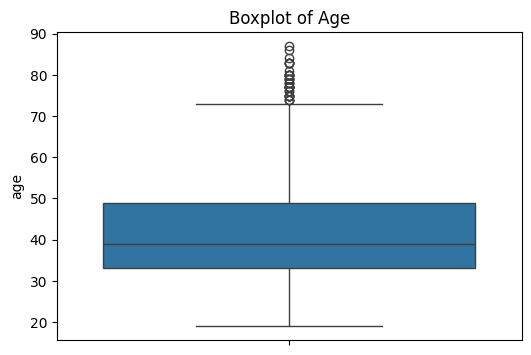

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# bank 데이터 불러오기 (예: CSV 파일에서)
# bank = pd.read_csv('bank.csv', sep=';')  # 실제 파일 경로와 구분자 확인 필요

# 수치적 요약(이산형)
print(bank['age'].describe())

# 그래프적 요약(이산형)
plt.figure(figsize=(6, 4))
sns.boxplot(y=bank['age'])
plt.title("Boxplot of Age")
plt.show()

▶ 직업 항목별 빈도:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


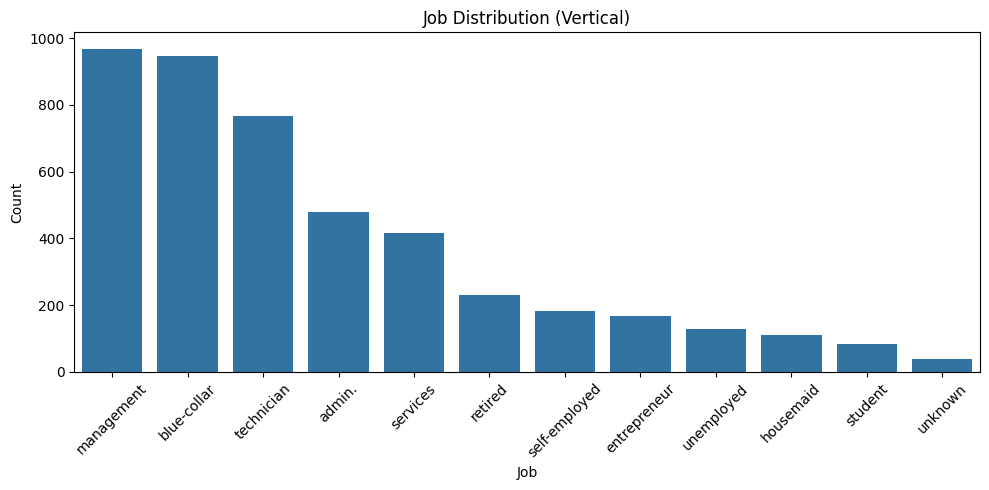

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 로드 (실제 환경에선 해당 라인 생략 가능)
# bank = pd.read_csv('bank.csv', sep=';')

# 수치적 요약(명목형)
job_counts = bank['job'].value_counts()
print("▶ 직업 항목별 빈도:")
print(job_counts)

# 세로 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='job', data=bank, order=job_counts.index)
plt.title('Job Distribution (Vertical)')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

▶ 교차표 (행/열 합 포함):
marital        divorced  married  single   All
job                                           
admin.               69      266     143   478
blue-collar          79      693     174   946
entrepreneur         16      132      20   168
housemaid            13       84      15   112
management          119      557     293   969
retired              43      176      11   230
self-employed        15      127      41   183
services             62      236     119   417
student               0       10      74    84
technician           89      411     268   768
unemployed           22       75      31   128
unknown               1       30       7    38
All                 528     2797    1196  4521


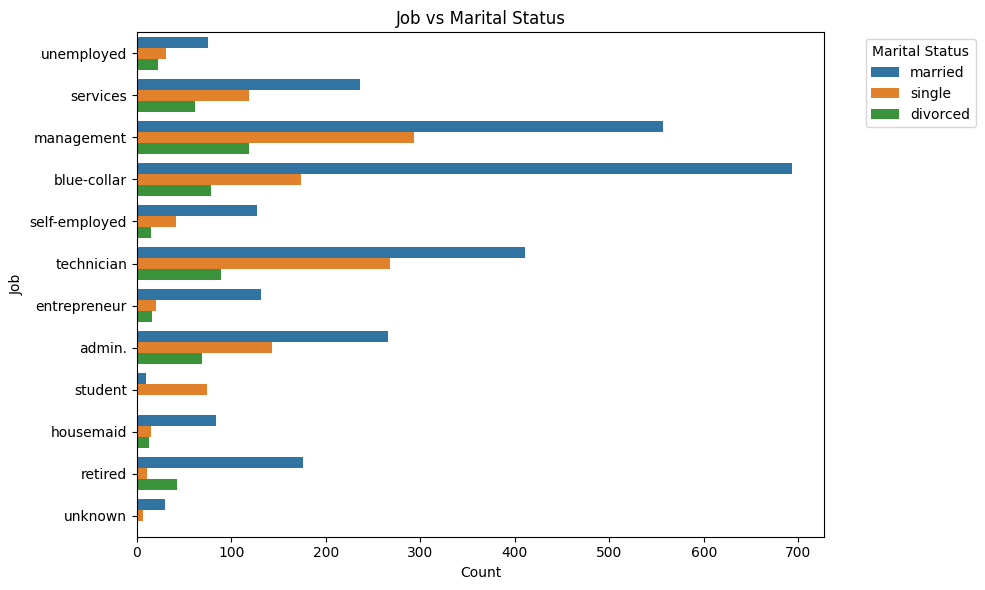

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터셋 (CSV에서 불러오는 경우)
# bank = pd.read_csv('bank.csv', sep=';')

# ▶ 수치적 요약: 교차표 + 합계 추가
cross_tab = pd.crosstab(bank['job'], bank['marital'], margins=True)
print("▶ 교차표 (행/열 합 포함):")
print(cross_tab)

# ▶ 그래프적 요약: 그룹화된 가로 막대그래프
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, y='job', hue='marital', dodge=True)
plt.title('Job vs Marital Status')
plt.xlabel('Count')
plt.ylabel('Job')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

▶ 나이 범주별 정기예금 가입 현황:
y         no  yes
age_c            
~30세     408   74
31-40세  1623  185
41-50세  1080  123
51-60세   770   84
61세~     119   55
▶ 나이 범주별 가입 비율:
y             no       yes
age_c                     
~30세    0.846473  0.153527
31-40세  0.897677  0.102323
41-50세  0.897756  0.102244
51-60세  0.901639  0.098361
61세~    0.683908  0.316092


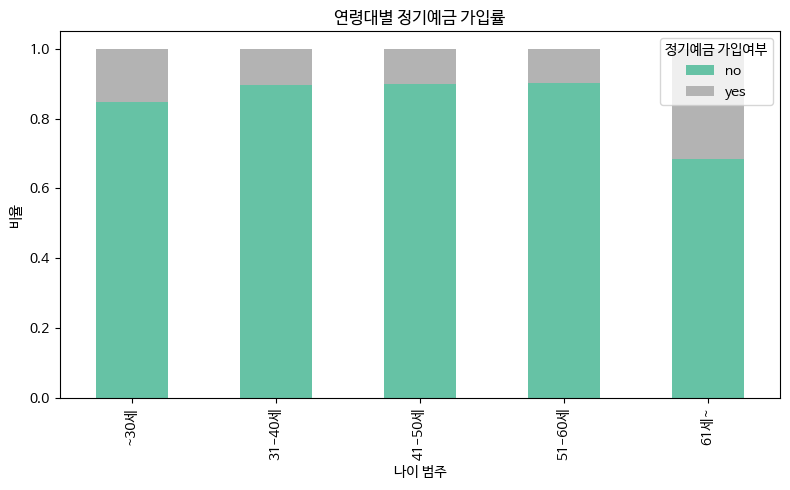

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이 범주화 (예: age 컬럼 존재 가정)
bins = [0, 30, 40, 50, 60, 100]
labels = ['~30세', '31-40세', '41-50세', '51-60세', '61세~']
bank['age_c'] = pd.cut(bank['age'], bins=bins, labels=labels, right=False)

# 교차표
tt = pd.crosstab(bank['age_c'], bank['y'])
print("▶ 나이 범주별 정기예금 가입 현황:")
print(tt)

# 비율 테이블 (행 기준 비율)
ss = tt.div(tt.sum(axis=1), axis=0)
print("▶ 나이 범주별 가입 비율:")
print(ss)

# 시각화 (가입/미가입 비율 stacked bar chart)
ss.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title("연령대별 정기예금 가입률")
plt.xlabel("나이 범주")
plt.ylabel("비율")
plt.legend(title="정기예금 가입여부")
plt.tight_layout()
plt.show()

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')